In [1]:
import pandas as pd
import re
import numpy as np
from PIL import Image

In [2]:
b = open('../../../data/cien.txt','r', encoding="utf8")
text = b.read()

In [ ]:
text = text.split('www.lectulandia.com - Página 12\n')[1].split('www.lectulandia.com - Página 289')[0]

## Preprocesamiento

In [4]:
text = re.sub('(\s?www.lectulandia.com - Página \d*)','',text)
text = re.sub('\n',' ',text)

In [5]:
text = re.split('\x0c[A-Z]\s',text)
texto = [re.sub("\s\s+" , " ", capi) for capi in text]
capitulos = texto[1:]
text = ''.join(capitulos)

In [6]:
capitulos[1]

' uando el pirata Francis Drake asaltó a Riohacha, en el siglo XVI, la bisabuela de Úrsula Iguarán se asustó tanto con el toque de rebato y el estampido de los cañones, que perdió el control de los nervios y se sentó en un fogón encendido. Las quemaduras la dejaron convertida en una esposa inútil para toda la vida. No podía sentarse sino de medio lado, acomodada en cojines, y algo extraño debió quedarle en el modo de andar, porque nunca volvió a caminar en público. Renunció a toda clase de hábitos sociales obsesionada por la idea de que su cuerpo despedía un olor a chamusquina. El alba la sorprendía en el patio sin atreverse a dormir, porque soñaba que los ingleses con sus feroces perros de asalto se metían por la ventana del dormitorio y la sometían a vergonzosos tormentos con hierros al rojo vivo. Su marido, un comerciante aragonés con quien tenía dos hijos, se gastó media tienda en medicinas y entretenimientos buscando la manera de aliviar sus terrores. Por último liquidó el negocio

In [6]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import string

In [7]:
palabrasparar = ['entonces',
                'tan',
                'sino',
                'mientras',
                'dijo',
                'mismo',
                'después',
                'dos',
                'dio']

In [8]:
stop_words1 = stopwords.words('spanish')
stop_words1.extend(palabrasparar)
stop_words = set(stop_words1)

In [9]:
text = "".join([word for word in text if word not in string.punctuation])

In [10]:
tokenizer=RegexpTokenizer("['\w]+")
tokens = tokenizer.tokenize(text)
words = [word for word in tokens if word.lower() not in stop_words]

In [11]:
vocabulary = set(words)
print('The vocabulary size is: ',len(vocabulary))

The vocabulary size is:  15620


In [12]:
print('The number of words that have been removed is {} which is {:.2f}% of total words'.format
      (len(tokens)-len(words),len(words)/len(tokens)*100))

The number of words that have been removed is 71070 which is 48.42% of total words


In [13]:
from nltk.util import ngrams
from collections import Counter

unigrams = list(ngrams(words, 1))
freq = Counter(unigrams)
topN= freq.most_common(400)

wordscount = {w[0]:f for w, f in topN} 

## Nube de palabras

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator

In [15]:
def white_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "rgb(66, 70, 48)" 

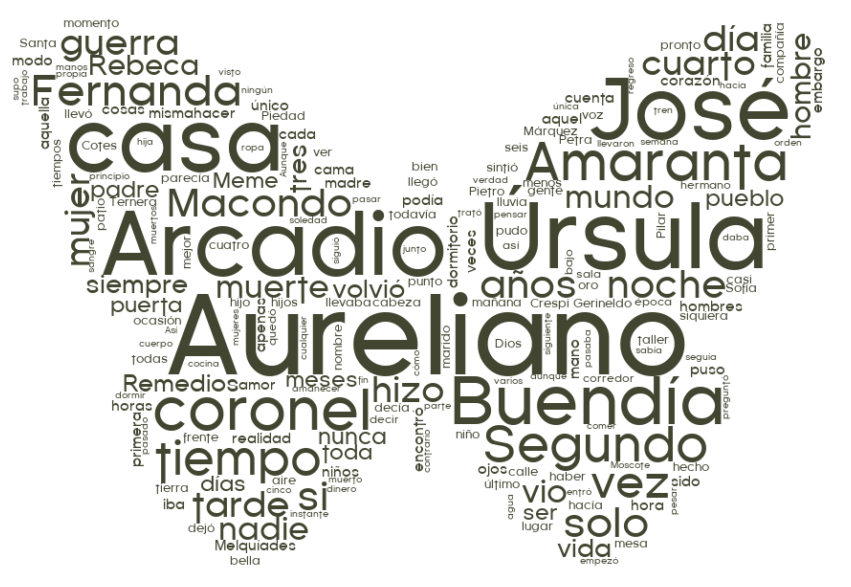

In [17]:
glasses_mask = np.array(Image.open("../../../data/mariposa1.PNG"))
wordcloud = WordCloud(font_path = '../../../styles/Florsn01.ttf', background_color="rgba(66, 70, 48, 0)", mode="RGBA",mask=glasses_mask, width=1000, height=1500,)
wordcloud.fit_words(wordscount)
wordcloud.recolor(color_func=white_color_func, random_state=3)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.savefig('100_mariposa.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()


## Por capitulos

In [ ]:

words = [word for word in text if word not in stopwords]
words = [word for word in words if "'" not in word]
word_count = Counter(words)